In diesem Tutorial beschäftigen Sie sich anhand eines Spielbeispiels mit den Problemen einer Überanpassung oder Unteranpassung der linearen bzw. logistischen Regression.

In der begleitenden Python-File `utils.py` befinden sich Hilfsfunktionen zum Erstellen eines zufälligen Trainings- und Testdatensatzes mit einer Beobachtung und einer kontinuierlichen Zielvariablen.

## (2.2.1) Lineare Regression <span style="color:green; font-size:1em">(o)</span> <span style="font-size:1em">&#x1F4D7;</span>

**<span style="color:green; font-size:2em"> (a) </span>** <span style="font-size:2em">&#x1F4D7;</span> Erstellen Sie per `utils.get_train_data()` einen Trainingsdatensatz mit Inputvariablen $\{x^{(i)} \;  | \; i = 1, ..., N\}$ und Zielvariablen $\{y_T^{(i)}\; | \; i = 1, ..., N\}$ und führen Sie darauf eine lineare Regression aus.

**<span style="color:green; font-size:2em"> (b) </span>** <span style="font-size:2em">&#x1F4D7;</span> Treffen Sie eine Vorhersage der Zielvariablen, $\{\hat{y}^{(i)}\; | \; i = 1, ..., N\}$,  für die Beobachtungen des Trainingsdatensatzes. Beurteilen Sie die Qualität der Vorhersage, indem Sie einmal den durchschnittlichen quadratischen und einmal den durchschnittlichen absoluten Fehler der Vorhersage berechnen:

(i) Quadratischer Fehler: $ \frac{1}{N} \sum_{i=1}^N (\hat{y}^{(i)} - y_T^{(i)})^2$

(ii) Absoluter Fehler: $ \frac{1}{N} \sum_{i=1}^N  | \hat{y}^{(i)} - y_T^{(i)} | $

**<span style="color:green; font-size:2em"> (c) </span>** <span style="font-size:2em">&#x1F4D7;</span>  Visualisieren Sie das Ergebnis der Regression auf eine geeignete Weise.

**<span style="color:green; font-size:2em"> (d) </span>** <span style="font-size:2em">&#x1F4D7;</span>  Erstellen Sie nun einen Testdatensatz per `utils.get_test_data()` und treffen Sie erneut eine Vorhersage der Zielvariablen mit dem in **b)** erstellten Modell. Berechnen Sie den druchschnittlichen quadratischen und absoluten Fehler der Vorhersage auf dem Testdatensatz. Interpretieren Sie das Ergebnis.

**<span style="color:orange; font-size:2em"> (e) </span>** <span style="font-size:2em">&#x1F4D7;</span>  Wiederholen Sie die Aufgaben **b)** bis **c)** für ein quadratisches Modell (Nutzen Sie dafür zum Beispiel `from sklearn.preprocessing import PolynomialFeatures`.). Interpretieren Sie die Ergebnisse.

In [9]:
import utils
import numpy as np

# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
plt.style.use('seaborn-whitegrid')

### a) - d)

In [10]:
### Convenience Functions

# Visualisierung eines Fits
def visualize_predict(model, xmin=0, xmax=10):
    ax = plt.gca()
    
    x_vis = np.linspace(0, 10, 100)
    
    # y_vis = w1 * x_vis + w2 * x_vis ** 2 + b
    y_vis = model.predict(x_vis[:, np.newaxis])
    
    ax.plot(x_vis, y_vis, "orange")

# Quadratischer Fehler
def quadratic_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Absoluter Fehler
def absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [11]:
### Trainingsdaten
x_train, y_train = utils.get_train_data()

### Testdaten
x_test, y_test = utils.get_test_data()

Quadratischer Trainingsfehler: 123.05 | Quadratischer Testfehler 138.86
Absoluter Trainingsfehler: 8.75 | Absoluter Testfehler: 9.51


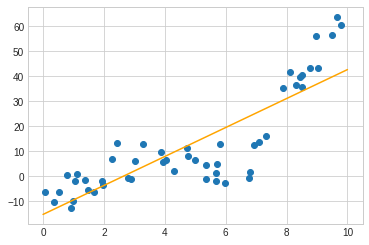

In [12]:
### Modell fitten
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)


### Vorhersagen
# Trainingsdaten vorhersagen
y_pred_train = linear_regression.predict(x_train)
# Testdaten vorhersagen
y_pred_test = linear_regression.predict(x_test)


### Fehler berechnen
# Trainingsfehler
quadratic_train_error = quadratic_error(y_train, y_pred_train)
absolute_train_error = absolute_error(y_train, y_pred_train)

# Testfehler
quadratic_test_error = quadratic_error(y_test, y_pred_test)
absolute_test_error = absolute_error(y_test, y_pred_test)


### Visualisierung
# Trainingsdaten
plt.scatter(x_train, y_train)

# Vorhersagefunktion
visualize_predict(linear_regression)


print(f"Quadratischer Trainingsfehler: {quadratic_train_error:.2f} | Quadratischer Testfehler {quadratic_test_error:.2f}")
print(f"Absoluter Trainingsfehler: {absolute_train_error:.2f} | Absoluter Testfehler: {absolute_test_error:.2f}")

### e)

Quadratischer Trainingsfehler: 61.93 | Quadratischer Testfehler 73.32
Absoluter Trainingsfehler: 6.30 | Absoluter Testfehler: 7.05


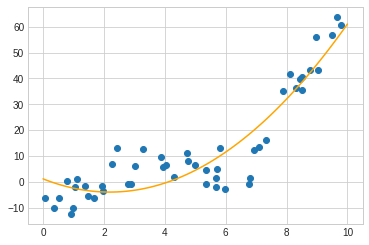

In [13]:
### Modell erstellen und fitten (für Pipelines siehe weiter unten)
quadratic_regression = make_pipeline(PolynomialFeatures(include_bias=False, degree=2), LinearRegression())
quadratic_regression.fit(x_train, y_train)


### Vorhersagen
# Trainingsdaten vorhersagen
y_pred_train = quadratic_regression.predict(x_train)
# Testdaten vorhersagen
y_pred_test = quadratic_regression.predict(x_test)


### Fehler berechnen
# Trainingsfehler
quadratic_train_error = quadratic_error(y_train, y_pred_train)
absolute_train_error = absolute_error(y_train, y_pred_train)

# Testfehler
quadratic_test_error = quadratic_error(y_test, y_pred_test)
absolute_test_error = absolute_error(y_test, y_pred_test)


### Visualisierung
# Trainingsdaten
plt.scatter(x_train, y_train)

# Vorhersagefunktion
visualize_predict(quadratic_regression)


print(f"Quadratischer Trainingsfehler: {quadratic_train_error:.2f} | Quadratischer Testfehler {quadratic_test_error:.2f}")
print(f"Absoluter Trainingsfehler: {absolute_train_error:.2f} | Absoluter Testfehler: {absolute_test_error:.2f}")

### Erklärung Pipelines

#### i) Quadratische Regression ohne Pipelines

In [14]:
# Pipelines
# Vergleich mit und ohne Pipeline

### ohne Pipelines

# 1. Schritt - Daten transformieren
poly_expansion = PolynomialFeatures(degree=2, include_bias=False)

# 1.1. fitten der Expansion - stellt fest, wie viele Features generiert werden sollen
poly_expansion.fit(x_train)

# 1.2. transformieren
x_train_poly = poly_expansion.transform(x_train)
x_test_poly = poly_expansion.transform(x_test)


# 2. Schritt - Lineare Regression fitten
linear_regression = LinearRegression()
linear_regression.fit(x_train_poly, y_train)


# 3. Schritt - Validierung
y_pred_train = linear_regression.predict(x_train_poly)
y_pred_test = linear_regression.predict(x_test_poly)

print(quadratic_error(y_pred_train, y_train))
print(quadratic_error(y_pred_test, y_test))

61.93459558870625
73.31610163225241


#### ii) Quadratische Regression mit Pipelines

In [16]:
### mit Pipelines

quadratic_regression = make_pipeline(
    PolynomialFeatures(include_bias=False, degree=2),
    LinearRegression(normalize=True)
)

quadratic_regression.fit(x_train, y_train)

y_pred_train = quadratic_regression.predict(x_train)
y_pred_test = quadratic_regression.predict(x_test)

print(quadratic_error(y_pred_train, y_train))
print(quadratic_error(y_pred_test, y_test))

61.93459558870622
73.3161016322524


#### iii) (Advanced, Optional) Cubische Regression mit Pipelines, Feature Scaling und Regularisierung

In [18]:
# für eine Regression mit Regularisierung benutze `Ridge`
from sklearn.linear_model import Ridge

cubic_ridge_regression = make_pipeline(
    PolynomialFeatures(include_bias=False, degree=3),
    StandardScaler(),  # Alternative zum Skalieren von Features
    Ridge()
)

cubic_ridge_regression.fit(x_train, y_train)

y_pred_train = cubic_ridge_regression.predict(x_train)
y_pred_test = cubic_ridge_regression.predict(x_test)

print(quadratic_error(y_pred_train, y_train))
print(quadratic_error(y_pred_test, y_test))

52.139521907718205
61.60367162866368


## (2.2.2) Zufällige Trainingsdaten **<span style="color:orange; font-size:1em"> (oo) </span>** <span style="font-size:1em">&#x1F4D9;</span> 

Die Hilfsfunktion `utils.get_train_data()` erzeugt bei jedem Aufruf einen neuen, zufälligen, Datensatz während die Funktion `utils.get_test_data()` einen festen Testdatensatz erzeugt. In dieser Aufgabe untersuchen Sie, welchen Einfluss die Zufälligkeit des Trainingsdatensatzes auf die Qualität des Modells hat.

**<span style="color:green; font-size:2em"> (a) </span>** <span style="font-size:2em">&#x1F4D7;</span>  Erstellen und visualisieren Sie exemplarisch zwei verschiedene Trainingsdatensätze.

**<span style="color:orange; font-size:2em"> (b) </span>** <span style="font-size:2em">&#x1F4D9;</span>  Wiederholen Sie die Aufgaben **1a)**, **1b)** und  **1d)** für $10-20$ zufällig generierte Trainingsdatensätze. Entscheiden Sie sich dabei für eine der Fehlermetriken (zum Beispiel RMSE). Speichern Sie sich die Fehler für jede der $10-20$ Wiederholungen des Experiments.

Berechnen Sie dann folgende Größe: Für jeden Trainingsdatensatz haben Sie ein separates Modell trainiert und evaluiert. Daraus resultiert jeweils ein Trainingsfehler und ein Testfehler. Berechnen Sie nun den durchschnittlichen Trainingsfehler und Testfehler und die Standardabweichung dieser Fehler über alle Trainingsdatensätze hinweg (*Hinweis: der Trainings- und Testfehler sind für sich genommen schon Durchschnittswerte - nämlich über die Datenpunkte hinweg. Hier aber ist gemeint, die Durchschnittswerte dieser Fehler für die Widerholungen des Experiments zu berechnen - in einem gewissen Sinne also Durchschnittswerte der Durchschnittswerte*)

**<span style="color:orange; font-size:2em"> (c) </span>** <span style="font-size:2em">&#x1F4D9;</span>  Visualisieren Sie die Ergebnisse aus **c)** indem Sie die $10-20$ verschiedenen linearen Modelle in einem einzigen Plot darstellen.

**<span style="color:orange; font-size:2em"> (d) </span>** <span style="font-size:2em">&#x1F4D9;</span> Wiederholen Sie nun die vorherigen Aufgabenteile während Sie anstelle eines linearen Modells ein quadratisches Modell oder sogar ein Modell höheren Grades verwenden (siehe Aufgabe **1d)**).

**<span style="color:green; font-size:2em"> (e) </span>** <span style="font-size:2em">&#x1F4D9;</span> Interpretieren Sie Ihre Ergebnisse.

## (2.2.3) Bias-Variance-Tradeoff <span style="color:red; font-size:1em"> (ooo) </span> <span style="font-size:1em">&#x1F4D8;</span> 


In der vorherigen Aufgabe haben Sie eine Reihe von Modellen auf der Basis zufälliger Trainingsdaten erstellt und für jedes Modell den Testfehler berechnet. Daraufhin ließ sich der durchschnittliche Testfehler sowie die Varianz des Testfehlers schätzen. Sie haben das lineare Modell mit dem quadratischen Modell verglichen.

Nun wollen wir die Komplexität des Modells systematisch erhöhen.

Als Maß für die Komplexität des Modells nehmen wir den Grad der polynomischen Expansion an. Der Parameter `'degree'` kann von $1$ (lineares Modell) systematisch erhöht werden. Für jede Komplexitätsstufe lassen sich dann eine Reihe Modelle auf Basis zufälliger Trainingsdaten erstellen. Der Testdatensatz bleibt stets derselbe.

Wiederholen Sie für jeden Grad (`degree`) der polynomischen Expansion die folgenden Schritte:

*(i)* Trainieren Sie $10-20$ verschiedene Modelle jeweils auf einem zufällig generierten Trainingsdatensatz. Um die gewünschten Ergebnisse sichtbar zu machen, bietet es sich an, die Menge an Beobachtungen noch weiter zu reduzieren. Nutzen Sie dafür das Argument `n_samples` der Funktion `utils.get_train_data()`.

*(ii)* Berechnen Sie die durchschnittliche Vorhersage zwischen diesen Modellen und plotten Sie diese etwa für $x \in [0, 10]$.

*(iii)* Berechnen Sie die Standardabweichung zwischen den verschiedenen Vorhersagen und visualisieren Sie diese auf eine geeignete Weise für $x \in [0, 10]$.

*(iv)* Benutzen Sie `utils.true_function` um die den Daten tatsächlich zu Grunde liegende Funktion zu plotten. 

Versuchen Sie, die Plots aus *(ii)*-*(iv)* für jeden Grad der polynomischen Expansion in einem einzigen Plot darzustellen. Interpretieren Sie ihre Ergebnisse.

## (2.2.4) Regularisierung <span style="color:green; font-size:1em"> (o) </span> - <span style="color:orange; font-size:1em"> (oo) </span> <span style="font-size:1em">&#x1F4D7;</span> 


Um das Risiko einer Überanpassung zu verhindern, kann die lineare/polynomiale Regression regularisiert werden. Dazu wird der Verlustfunktion ein zusätzlicher Regularisierungsterm hinzugefügt, der dafür sorgt, dass Koeffizienten kleiner Magnitude gegenüber Koeffizienten großer Magnitude bevorzugt werden.

Scikit-Learn stellt die lineare Regression mit Regularisierung in den Klassen `Ridge`, `ElasticNet` und `Lasso` zur Verfügung.

**<span style="color:green; font-size:2em"> (a) </span>** <span style="font-size:2em">&#x1F4D7;</span>  Beschäftigen Sie sich zunächst der Dokumentation aller drei Klassen. Was ist der wesentliche Unterschied zwischen den Klassen? Benutzen Sie im Folgenden nur die Klasse `Ridge` für eine lineare Regression mit L2-Regularisierung. Setzen Sie in jedem Fall `normalize=True` für alle weiteren Experimente.

**<span style="color:green; font-size:2em"> (b) </span>** <span style="font-size:2em">&#x1F4D7;</span>  Wählen Sie ein Regressionsmodell mit einem mittleren Grad der polynomischen Expansion, etwa 6-8. Generieren Sie zunächst einen Trainingsdatensatz wie in den vorherigen Aufgaben und fitten Sie das Modell. Vergleichen Sie die Ergebnisse einer Regression mit `alpha=0.0`, `alpha=1.0` und `alpha=10.0`, indem Sie den Fit wie in den vorherigen Aufgaben auf eine geeignete Weise visualisieren und die Trainings- und Testfehler der Verfahren miteinander vergleichen. Interpretieren Sie.

**<span style="color:orange; font-size:2em"> (c) </span>** <span style="font-size:2em">&#x1F4D9;</span>  Varieren Sie nun den Hyperparameter `alpha` der Regression systematisch, z.B. logarithmisch: $\alpha = 0, 10^{-3}, 5 \cdot 10^{-3}, 10^{-2}, ..., 10$ (Tipp: `np.logspace`). Trainieren Sie nun für jeden Wert des Hyperparameters $20-50$ verschiedene Modelle auf jeweils zufällig generierten Trainingsdaten und berechnen Sie jedesmal den Trainingsfehler sowie den Testfehler. Plotten Sie dann den durchschnittlichen Trainings- sowie Testfehler (über die zufälligen Trainingsdatensätze hinweg) sowie, in einem separaten Plot, deren Standardabweichung, gegen den Wert des Hyperparameters. Um das Ergebnis sichtbar zu machen, können Sie die Menge an Beobachtungen für die Trainingsdaten reduzieren, indem Sie das Argument `n_samples` der Funktion `utils.get_train_data()` verwenden. Interpretieren Sie das Ergebnis.


In [1]:
from sklearn.linear_model import Ridge, ElasticNet, Lasso